# Understanding The Data:
### Flipkart Earbuds Dataset

* This notebook consist of the data analysis and visualisation of Earbuds data of Flipkart website
* The dataset consist of 8 columns.
* It consist of data scraped from Earbuds Category for around 20 pages of flipkart website using Beautifulsoup and request library

____
The dataset has following columns:
* **Product**    : It consist of list of all product names available under Earbuds category on www.flipkart.com
* **Brand**      : It is the list of all brands the product belongs to
* **Rating**     : It is rating given by customers
* **Reviews**    : Number of reviews given under the product
* **MRP**        : Original Market Retail Price (in Rupees) of the product
* **Offer_Price**: Offer price (in Rs) of the product
* **Discount**   : Percentage of discount given on the product
* **Discounted_Price** : It is MRP subtracted from Offer_Price in rupees


# Problem Statement: 
In this Project I am going to scrape the data about Earbuds from Flipkart website using BeautifulSoup and Request libraries, and convert into a csv file. After loading and reading the data from csv file, I will perform univariate analysis, bi/multi variate analysis on different column attributes. and finally  visualise the data using different plots and charts such as scatter plot, bar plot, count plot and much more. To perform visualisation I will be  importing matplotlib and seaborn libraries to plot, understand and make meaningful outcomes from the dataset. These insights will help in brand and market analysis, price analysis and product analysis.

# Data Analysis and visualisation:
In this Project we will analyse the folowing:
## 1. Loading Libraries
## 2. Reading CSV File
## 3. Cleaning Data
## 4. Analysis Data
          * Products With Maximum Values:
          * Top 10 Products Based On top Ratings, Reviews and discount
          * Top 10 products with maximum number of reviews
          * Top10 Most affordable products
### 5. Univariate Analysis using Count, Bar, Pie chart, Box, Strip, Violin, Hist, Distplot
            On different variables         
### 6. Bi/Multi variate analysis using scatter, bar plot, box plot
           * Top 5 Brands With Maximum Number of Reviews
           * Top 10 most affordable products Based On Offer_Price
           * Top 10 Expensive Products Based On Offer_Price
           * Top10 Expensive Brands
           * Top10 Affordable Brands
           * Some more analysis on different variables
### 7.     Heatmap, pair plot

### 8. Conclusion



# 1. Loading Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 2. Reading CSV File

In [3]:
df= pd.read_csv('Flipkart_Earbuds.csv')

In [4]:
df

,Product,Rating,MRP,Offer_Price,Discount,Reviews,Brand,Discounted_Price
0,boAt Airdopes 131 with upto 60 Hours and ASAP ...,4.0,2990.0,1299.0,56% off,"(12,58,071)",boAt,1691.0
1,boAt Airdopes 131 with upto 60 Hours and ASAP ...,4.0,2990.0,1299.0,56% off,"(12,58,071)",boAt,1691.0
2,"Noise Buds VS102 with 14 Hours Playtime, 11mm ...",4.1,2999.0,1099.0,63% off,"(2,30,494)",Noise,1900.0
3,OPPO Enco Buds 2 with 28 hours Battery life & ...,4.2,3999.0,1999.0,50% off,"(47,856)",OPPO,2000.0
4,"boAt Airdopes 161 with ASAP Charge, 10mm Drive...",4.1,2490.0,1399.0,43% off,"(2,46,850)",boAt,1091.0
...,...,...,...,...,...,...,...,...
795,Tunifi F9 Earbuds Upto 48 Hours Playtime with ...,3.8,7999.0,799.0,90% off,(414),Tunifi,7200.0
796,Hammer KO 2.0 Truly Wireless Earbuds Bluetooth...,3.9,9999.0,2399.0,76% off,(300),Hammer,7600.0
797,Tunifi Earbuds T-2 Upto 48 Hours Playback with...,3.6,4499.0,799.0,82% off,(34),Tunifi,3700.0
798,"UPOZA Earbuds Gaming TWS with 10mm Drivers, 40...",3.2,7999.0,749.0,90% off,(218),UPOZA,7250.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           800 non-null    object 
 1   Rating            715 non-null    float64
 2   MRP               796 non-null    float64
 3   Offer_Price       800 non-null    float64
 4   Discount          796 non-null    object 
 5   Reviews           715 non-null    object 
 6   Brand             800 non-null    object 
 7   Discounted_Price  796 non-null    float64
dtypes: float64(4), object(4)
memory usage: 50.1+ KB


In [6]:
df.describe()

,Rating,MRP,Offer_Price,Discounted_Price
count,715.000000,796.000000,800.000000,796.000000
mean,3.862098,3758.744975,1432.117500,2399.556533
std,0.322462,2698.884861,2285.966238,1752.312776
min,2.600000,299.000000,199.000000,69.000000
25%,3.700000,1999.000000,599.000000,1391.000000
50%,3.900000,2999.000000,899.000000,1700.000000
75%,4.000000,4999.000000,1399.000000,3000.000000
max,5.000000,26300.000000,26900.000000,12991.000000


In [7]:
df.shape

(800, 8)

In [8]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Offer_Price', 'Discount', 'Reviews',
       'Brand', 'Discounted_Price'],
      dtype='object')

In [9]:
df.dtypes

Product              object
Rating              float64
MRP                 float64
Offer_Price         float64
Discount             object
Reviews              object
Brand                object
Discounted_Price    float64
dtype: object

In [10]:
df.nunique()

Product             492
Rating               25
MRP                  88
Offer_Price         197
Discount             75
Reviews             322
Brand               177
Discounted_Price    274
dtype: int64

# 3. Data Cleaning

### We remove all the unnecessary special characters from out columns

In [11]:
df['Discount'] = df['Discount'].astype(str).str.replace('%','').str.replace('[a-zA-Z]+', '')
df['Reviews']= df['Reviews'].astype(str).str.replace('(','').str.replace(')', '').str.replace(',', '')
df

,Product,Rating,MRP,Offer_Price,Discount,Reviews,Brand,Discounted_Price
0,boAt Airdopes 131 with upto 60 Hours and ASAP ...,4.0,2990.0,1299.0,56,1258071,boAt,1691.0
1,boAt Airdopes 131 with upto 60 Hours and ASAP ...,4.0,2990.0,1299.0,56,1258071,boAt,1691.0
2,"Noise Buds VS102 with 14 Hours Playtime, 11mm ...",4.1,2999.0,1099.0,63,230494,Noise,1900.0
3,OPPO Enco Buds 2 with 28 hours Battery life & ...,4.2,3999.0,1999.0,50,47856,OPPO,2000.0
4,"boAt Airdopes 161 with ASAP Charge, 10mm Drive...",4.1,2490.0,1399.0,43,246850,boAt,1091.0
...,...,...,...,...,...,...,...,...
795,Tunifi F9 Earbuds Upto 48 Hours Playtime with ...,3.8,7999.0,799.0,90,414,Tunifi,7200.0
796,Hammer KO 2.0 Truly Wireless Earbuds Bluetooth...,3.9,9999.0,2399.0,76,300,Hammer,7600.0
797,Tunifi Earbuds T-2 Upto 48 Hours Playback with...,3.6,4499.0,799.0,82,34,Tunifi,3700.0
798,"UPOZA Earbuds Gaming TWS with 10mm Drivers, 40...",3.2,7999.0,749.0,90,218,UPOZA,7250.0


In [12]:
#Check number of duplicates and drop
df.duplicated().sum()

266

In [13]:
#There are 266 duplicates in our data, we drop them to avoid repetation of analysis
df1 = df.drop_duplicates()
df1

,Product,Rating,MRP,Offer_Price,Discount,Reviews,Brand,Discounted_Price
0,boAt Airdopes 131 with upto 60 Hours and ASAP ...,4.0,2990.0,1299.0,56,1258071,boAt,1691.0
2,"Noise Buds VS102 with 14 Hours Playtime, 11mm ...",4.1,2999.0,1099.0,63,230494,Noise,1900.0
3,OPPO Enco Buds 2 with 28 hours Battery life & ...,4.2,3999.0,1999.0,50,47856,OPPO,2000.0
4,"boAt Airdopes 161 with ASAP Charge, 10mm Drive...",4.1,2490.0,1399.0,43,246850,boAt,1091.0
5,Digiwins BTH F9 Pro Earbuds Upto 300Hrs Playti...,4.7,7999.0,799.0,90,6,Digiwins,7200.0
...,...,...,...,...,...,...,...,...
793,Accruma Exclusive Edition M19 Wireless Headpho...,NaN,1999.0,687.0,65,nan,Accruma,1312.0
794,Ucool SoulPods 50 Hours Playtime Gaming Blueto...,4.0,3499.0,799.0,77,2975,Ucool,2700.0
796,Hammer KO 2.0 Truly Wireless Earbuds Bluetooth...,3.9,9999.0,2399.0,76,300,Hammer,7600.0
797,Tunifi Earbuds T-2 Upto 48 Hours Playback with...,3.6,4499.0,799.0,82,34,Tunifi,3700.0


In [14]:
df1.isnull().sum()

Product              0
Rating              75
MRP                  2
Offer_Price          0
Discount             0
Reviews              0
Brand                0
Discounted_Price     2
dtype: int64

In [15]:
#We now fill our null values as well as convert our object data to either string or float

df1['Rating'] = pd.to_numeric(df1['Rating'], errors = 'coerce').replace(np.nan,0)
df1['Reviews'] = pd.to_numeric(df1['Reviews'], errors = 'coerce').replace(np.nan,0)
df1['MRP'] = pd.to_numeric(df1['MRP'], errors = 'coerce').replace(np.nan,0)
df1['Offer_Price'] = pd.to_numeric(df1['Offer_Price'], errors = 'coerce').replace(np.nan,0)
df1['Discount'] = pd.to_numeric(df1['Discount'], errors = 'coerce').replace(np.nan,0)
df1['Discounted_Price'] = pd.to_numeric(df1['Discounted_Price'], errors = 'coerce').replace(np.nan,0)

In [ ]:

df1= df1.astype({'Reviews': int, 'Discount': int})

Discount and reviews should be a whole number so we convert them to int. Products and Brand is categoriicl variable therefore we keep it as object 
and rwe convert rating, mrp,offer_Price,discount,discounted price to float


In [17]:
df1.dtypes

Product              object
Rating              float64
MRP                 float64
Offer_Price         float64
Discount              int32
Reviews               int32
Brand                object
Discounted_Price    float64
dtype: object

In [18]:
df1.describe()

,Rating,MRP,Offer_Price,Discount,Reviews,Discounted_Price
count,534.000000,534.000000,534.000000,534.000000,5.340000e+02,534.000000
mean,3.298876,3815.290262,1426.078652,64.926966,1.654813e+04,2448.930712
std,1.378609,3047.769965,2470.276635,17.693458,7.006042e+04,1884.580686
min,0.000000,0.000000,199.000000,0.000000,0.000000e+00,0.000000
25%,3.500000,1999.000000,599.000000,56.250000,1.000000e+01,1300.000000
50%,3.800000,2999.000000,786.000000,67.000000,1.815000e+02,1717.500000
75%,4.000000,4999.000000,1299.000000,76.000000,3.244250e+03,3287.500000
max,5.000000,26300.000000,26900.000000,93.000000,1.258071e+06,12991.000000


In [19]:
print(f'Product: {df1.Product.nunique()}')
print(f'Brand: {df1.Brand.nunique()}')


Product: 492
Brand: 177


In [20]:
#there are 177 different brands
print(df1['Brand'].unique())
print(len(df1['Brand'].unique()))

['boAt' 'Noise' 'OPPO' 'Digiwins' 'FD1' 'Highnotes' 'Boult' 'realme'
 'OnePlus' 'HOPPUP' 'Seashot' 'Tunifi' 'Aroma' 'Wings' 'DEFY' 'truke'
 'DAYNEO' 'PTron' 'Earboss' 'Mivi' 'BHAVISHU' 'TXOR' 'Met' 'SAMSUNG'
 'Cosmic' 'Fire-Boltt' 'Ashish' 'Nine9' 'PRANSHU' 'DigiClues' 'GAGANDEEP'
 'U&i' 'flying' 'Syska' 'SURYAKUSH' 'ORAIMO' 'TRUETAG' 'snowbudy' 'GREEN'
 'Raman' 'WeCool' 'WINGS' 'FINGER' 'Kabeer' 'Home' 'deamflum' 'blue'
 'BHIMANSHI' 'Shubham' 'BeastBass' 'FUR' 'ElectroMania' 'icall' 'Accruma'
 'JBL' 'NP' 'FRISTDOWN' 'Apple' 'Nothing' 'SONY' 'Motile' 'NECKTECH'
 'onechance' 'DeadX' 'APPLE' 'HUTUVI' 'CRISPLN' 'LELISKO' 'Grostar' 'EDIO'
 'DIZO' 'ModishOmbre' 'Matlek' 'MEETACH' 'PRONOVA' 'Clerby' 'Portronics'
 'SAIANSH' 'ashron' 'LONGWINGS' 'Blaupunkt' 'ROREX' 'Deepsheila'
 'STREAKIST' 'bAot' 'Makzee' 'CIHYARD' 'UPOZA' 'SENS' 'myxes' 'Ucool'
 'Edult' 'MR' 'NICK' 'MUSLEK' 'SHUANGYOU' 'Karan' 'Google' 'GadgetX'
 'Dozokil' 'NITBUDDY' 'Jagidar' 'WOF' 'SHOPLINE' 'LIVEBEAT' 'Livebeat'
 'THE' 'L

In [21]:
def barPerc_without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

        
        
def barPerc_without_hue2(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

<AxesSubplot:>

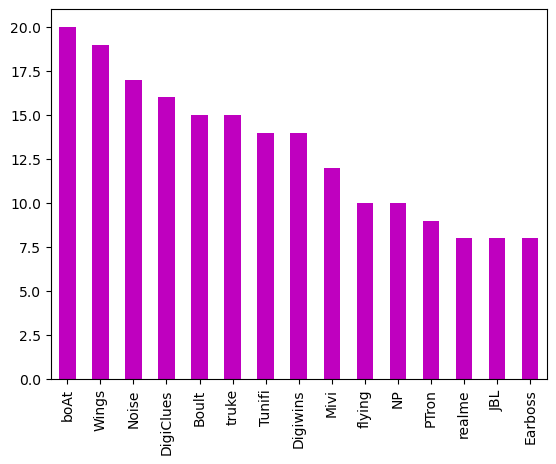

In [22]:
df1.Brand.value_counts().iloc[0:15].plot(kind="bar", color='m')

# 4. Analysis Data

## Products With Maximum Values:

In [23]:
best_col=['MRP','Offer_Price','Discounted_Price', 'Discount','Rating','Reviews']
for col_name in best_col:
    max_value = df1[col_name].max()
    print("Max {0}: {1} {2}".format(col_name, max_value, df1.loc[df1[col_name].idxmax()][0]))

Max MRP: 26300.0 APPLE Airpods Pro with MagSafe Charging Case Bluetooth ...
Max Offer_Price: 26900.0 APPLE Airpods Pro 2nd Generation Bluetooth Headset
Max Discounted_Price: 12991.0 LG FP6W Active Noise Cancelling Earbuds, 22 Hrs Battery...
Max Discount: 93 Digiwins T2 Earbuds Upto 250 Hrs Playtime With 1500 mAh...
Max Rating: 5.0 Digiwins T2 Earbuds Upto 250 Hrs Playtime With 1500 mAh...
Max Reviews: 1258071 boAt Airdopes 131 with upto 60 Hours and ASAP Charge Bl...


## Top 10 Products Based On top Ratings, Reviews and discount

In [24]:
r = df1.sort_values(by=['Rating', 'Reviews','Discount'], ascending=False)
top10=r.head(10)
top10

,Product,Rating,MRP,Offer_Price,Discount,Reviews,Brand,Discounted_Price
430,Dozokil High M10 Pro TWS Bluetooth Earbuds Wir...,5.0,2499.0,619.0,75,9,Dozokil,1880.0
778,KIMTOK True Wireless Bluetooth 5.1 in Ear Earb...,5.0,1999.0,999.0,50,8,KIMTOK,1000.0
81,Digiwins T2 Earbuds Upto 250 Hrs Playtime With...,5.0,7999.0,499.0,93,4,Digiwins,7500.0
237,FINGER THREE Exclusive M10 High-quality wirele...,5.0,6888.0,606.0,91,4,FINGER,6282.0
776,TRUETAG Headphone Earbuds M90 PRO with Power B...,5.0,4999.0,799.0,84,3,TRUETAG,4200.0
146,DigiClues Premium Series M88 with ENC HD+ Call...,4.9,7999.0,499.0,93,34,DigiClues,7500.0
729,Sennheiser CX True Wireless Earbuds for Music ...,4.8,10990.0,8990.0,18,8,Sennheiser,2000.0
288,Kabeer enterprises Premium TWS F9 True Wireles...,4.8,2999.0,663.0,77,6,Kabeer,2336.0
425,GadgetX TWS-I12 Twins Bluetooth Wireless Heads...,4.8,999.0,399.0,60,6,GadgetX,600.0
429,"Digiwins K85 Gaming TWS Earbuds, 45hr Playtime...",4.8,7999.0,949.0,88,5,Digiwins,7050.0


## Top 10 products with maximum number of reviews

In [25]:
top10reviewed=df1.sort_values('Reviews',ascending=False).head(10)
top10reviewed

,Product,Rating,MRP,Offer_Price,Discount,Reviews,Brand,Discounted_Price
0,boAt Airdopes 131 with upto 60 Hours and ASAP ...,4.0,2990.0,1299.0,56,1258071,boAt,1691.0
602,Mivi DuoPods M20 True Wireless Bluetooth Headset,3.8,2999.0,1199.0,60,292257,Mivi,1800.0
42,boAt Airdopes 381 with upto 20 Hours Playback ...,3.9,4990.0,1999.0,59,271282,boAt,2991.0
518,boAt Airdopes 381 with upto 20 Hours Playback ...,3.9,4990.0,2399.0,51,271282,boAt,2591.0
389,boAt Airdopes 381 Sunburn Edition with upto 20...,3.9,0.0,4990.0,0,271282,boAt,0.0
349,boAt Airdopes 402 / Airdopes 408 Bluetooth Hea...,3.8,5990.0,1999.0,66,261809,boAt,3991.0
4,"boAt Airdopes 161 with ASAP Charge, 10mm Drive...",4.1,2490.0,1399.0,43,246850,boAt,1091.0
73,"boAt Airdopes 161 with ASAP Charge, 10mm Drive...",4.1,2490.0,1599.0,35,246850,boAt,891.0
10,boAt Airdopes 163 Bluetooth Headset,4.1,2490.0,1399.0,43,246850,boAt,1091.0
70,"Noise Buds VS102 with 14 Hours Playtime, 11mm ...",4.1,2999.0,1299.0,56,230494,Noise,1700.0


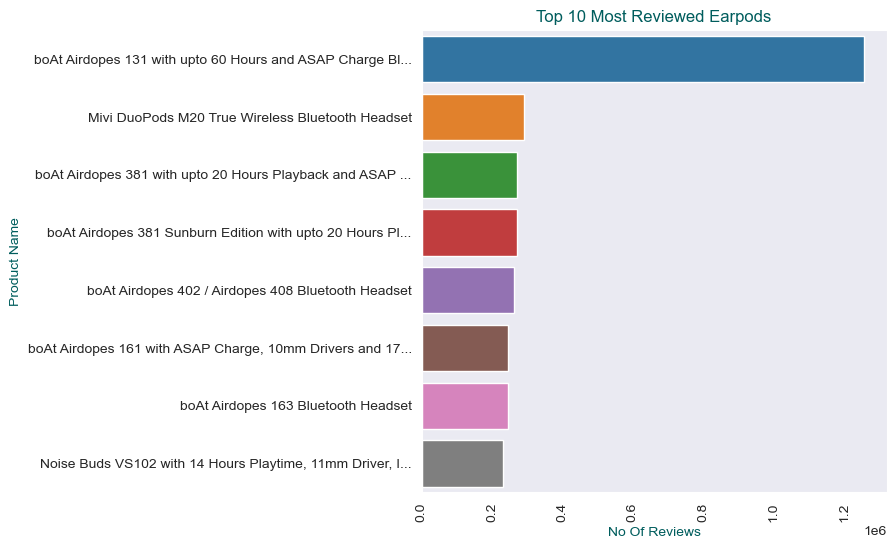

In [26]:
plt.figure(figsize=(6,6))
sns.set_style('dark')
sns.barplot(data=top10reviewed, y=top10reviewed['Product'], x=top10reviewed['Reviews'])
plt.xlabel('No Of Reviews', color='#005d5d')
plt.ylabel('Product Name', color='#005d5d')
plt.title('Top 10 Most Reviewed Earpods', color='#005d5d')
plt.xticks(rotation = 90)
plt.show()

Most reviewed product is `boAt Airdopes 131` with number of reviews `1258071`

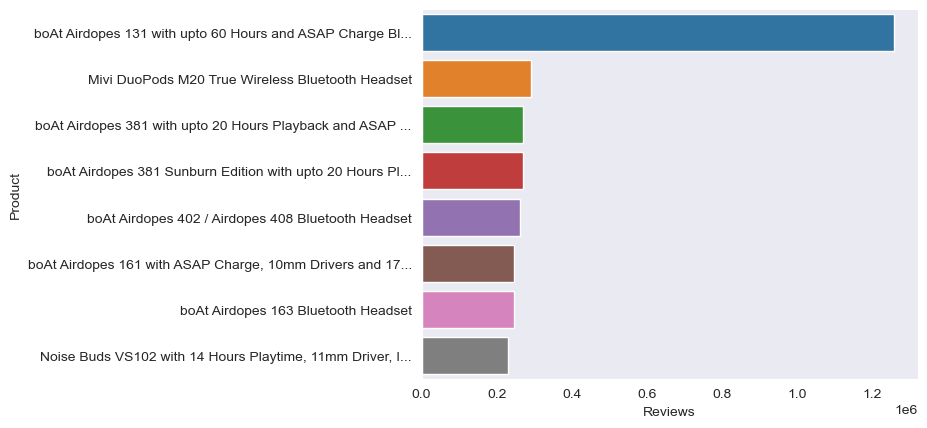

In [27]:
sns.barplot(data=top10reviewed, x=top10reviewed['Reviews'],y= top10reviewed['Product'])
plt.show()

## 10 Most affordable products

In [28]:
top10affordable= df1.sort_values(by='Offer_Price', ascending=True)
top10affordable

,Product,Rating,MRP,Offer_Price,Discount,Reviews,Brand,Discounted_Price
356,ROREX K1 Single Ear Wireless with Mic Bluetoot...,3.1,799.0,199.0,75,7,ROREX,600.0
667,MR ROBOT K1 Wireless Bluetoth Single Ear Heads...,0.0,999.0,219.0,78,0,MR,780.0
358,"Deepsheila 32H Playtime, 45ms Ultra-Low Latenc...",2.7,299.0,230.0,23,18,Deepsheila,69.0
697,MOOZMOB Latest Version B11 Neckband Bluetooth ...,3.4,1499.0,296.0,80,112,MOOZMOB,1203.0
233,icall X9 Mini Wireless Earbuds Comfortable For...,3.4,999.0,313.0,68,264,icall,686.0
...,...,...,...,...,...,...,...,...
527,Google Pixel Buds Pro with Active Noise Cancel...,4.6,19990.0,17990.0,10,443,Google,2000.0
293,APPLE Airpods (3rd Generation) with Lightning ...,4.3,19900.0,19100.0,4,120,APPLE,800.0
514,APPLE Airpods (3rd Generation) with Magsafe Ch...,4.3,20900.0,19600.0,6,2532,APPLE,1300.0
261,APPLE Airpods Pro with MagSafe Charging Case B...,4.5,26300.0,22500.0,14,50809,APPLE,3800.0


In [29]:
d=df1.Brand.value_counts().iloc[0:10]
d

boAt         20
Wings        19
Noise        17
DigiClues    16
Boult        15
truke        15
Tunifi       14
Digiwins     14
Mivi         12
flying       10
Name: Brand, dtype: int64

# 5. Univariate Analysis:

### Univariate analysis on Brand

In [38]:
df1['Brand']

0          boAt
2         Noise
3          OPPO
4          boAt
5      Digiwins
         ...   
793     Accruma
794       Ucool
796      Hammer
797      Tunifi
798       UPOZA
Name: Brand, Length: 534, dtype: object

<AxesSubplot:xlabel='count', ylabel='Brand'>

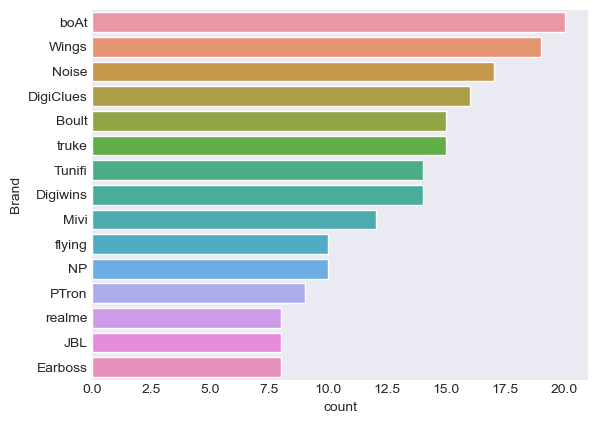

In [467]:
#count plot for top Brand
sns.countplot(y='Brand', data=df1, order= df1['Brand'].value_counts().iloc[:15].index)

We observe that Boat is the Brand with maximum number of Products. Followed by 2. Wings, 3. Noise, 4. Digiclues, 5.Boult

### Pie Chart on Brand

<AxesSubplot:ylabel='Brand'>

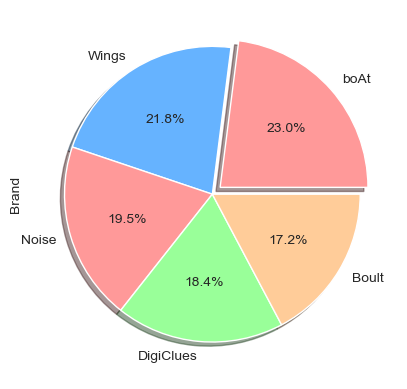

In [468]:
#Pie chart on % of products in each Brand
df1['Brand'].value_counts().iloc[:5].plot(kind='pie', autopct ='%1.1f%%', startangle=0, explode=(0.07,0,0,0,0), shadow=True, colors = ['#ff9999','#66b3ff','#ff9999','#99ff99','#ffcc99'])

* From the above Barplot and count plot we can observe that Boat Brand has most number of products i.e 23.0% 
* Top 5 Brands are: Boat, Wings, Noise, DigiClues,Boult

### Univariate Analysis on Discount Using distplot

In [39]:
df1['Discount'].describe()

count    534.000000
mean      64.926966
std       17.693458
min        0.000000
25%       56.250000
50%       67.000000
75%       76.000000
max       93.000000
Name: Discount, dtype: float64

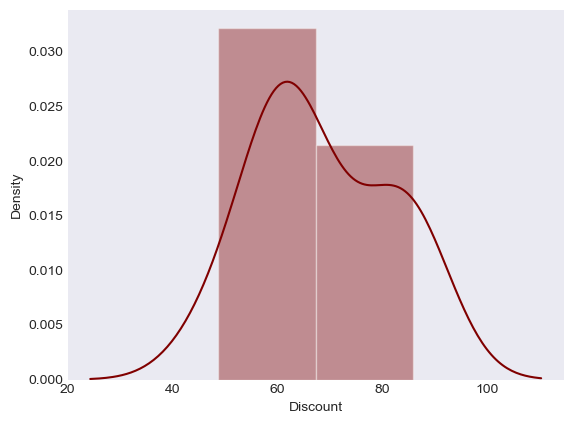

In [469]:
sns.distplot(top10Brands['Discount'], color='maroon')
plt.show()

The above Distplot can be depicts that discount ranges between `50% to 85%` and there is peak between `55% to 65%`

### histplot On Rating

In [40]:
df1['Rating'].describe()

count    534.000000
mean       3.298876
std        1.378609
min        0.000000
25%        3.500000
50%        3.800000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

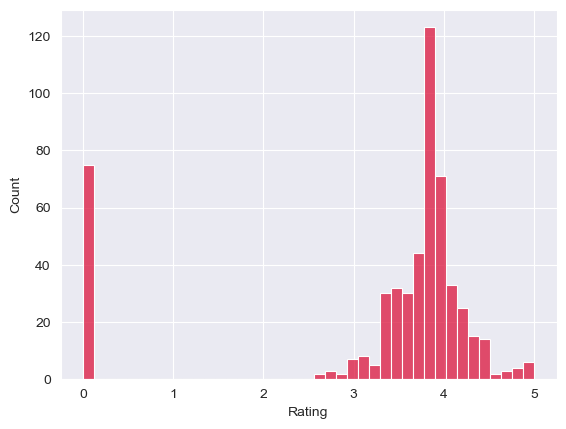

In [49]:
#Analyis on Rating
sns.histplot(df1.Rating, color='crimson')
plt.show()

Histplot on Rating says that ratings are given from 2.7 to 5 maximum, and maximum ratings are giben as 3.9 and 4. Ratings given 0 are not rated. 

## Box Plot on different variables

In [50]:
df1['Offer_Price'].describe()

count      534.000000
mean      1426.078652
std       2470.276635
min        199.000000
25%        599.000000
50%        786.000000
75%       1299.000000
max      26900.000000
Name: Offer_Price, dtype: float64

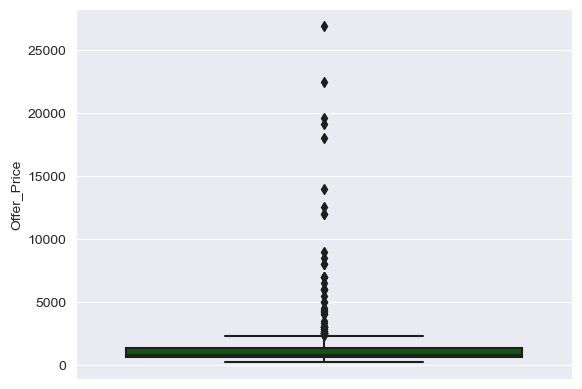

In [51]:
sns.boxplot(y='Offer_Price', data=df1, color='darkgreen')
plt.show()

Box plot for Offer Price depicts that Products rnge from around Rs 200 to around Rs 30,000 and rest are outliers

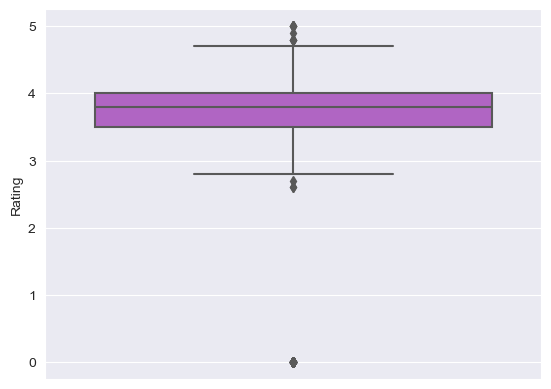

In [52]:
sns.boxplot(y='Rating', data=df1, color='mediumorchid')
plt.show()

Box plot for Rating can be visualised as Rating are in between 2.7 to around 4.8 ad Ratings as 0 and 5 are visualised as outliers

### Box plot for Discount

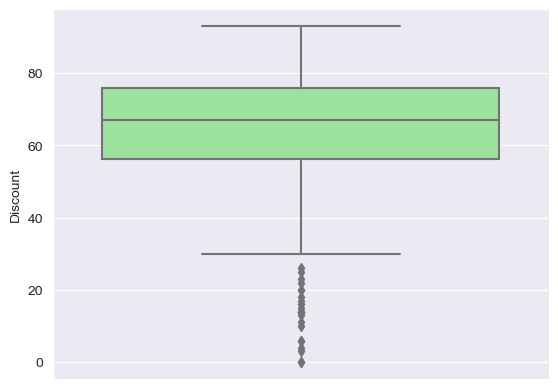

In [53]:
sns.boxplot(y='Discount', data=df1,color='lightgreen')
plt.show()

From the above plot we can describe that Discount is around in range of minimum 30% to maximum 87%. Median is around 70%, and interquantie range is 57% to 78%

In [54]:
df1['MRP'].describe()

count      534.000000
mean      3815.290262
std       3047.769965
min          0.000000
25%       1999.000000
50%       2999.000000
75%       4999.000000
max      26300.000000
Name: MRP, dtype: float64

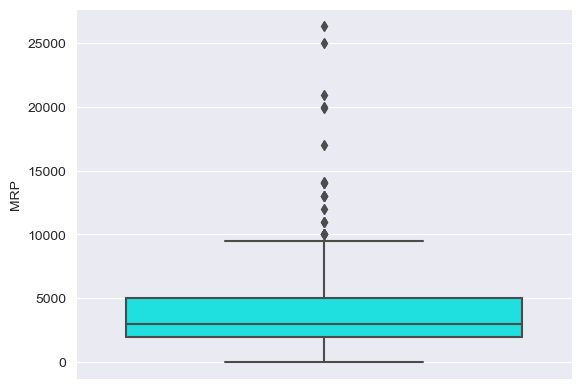

In [55]:
sns.boxplot(y='MRP', data=df1, color='cyan')
plt.show()

From the above box plot for MRP we can depict that price range is from Rs 0 to around 30,000 but maximum products are from range of Rs 1000 to 5000 and values above Rs 10,000 are visualised as outliers

## Univarite Analysis on Offer Price using distplot:

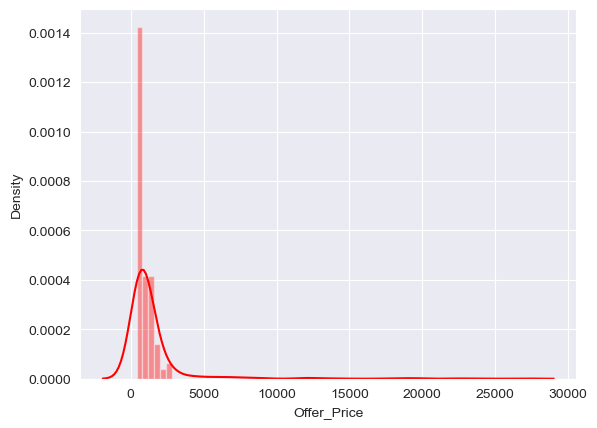

In [56]:
sns.distplot(df1['Offer_Price'], bins=[400,800,1200,1600,2000,2400,2800], color='red')
plt.show()

    The distplot depicts that Products are mostly in range of around Rs 200 to Rs 5000

### Strip Plot on Offer Price, Discount, MRP, Discounted Price

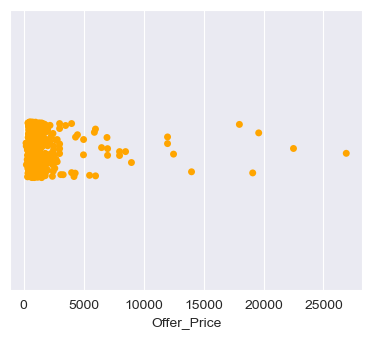

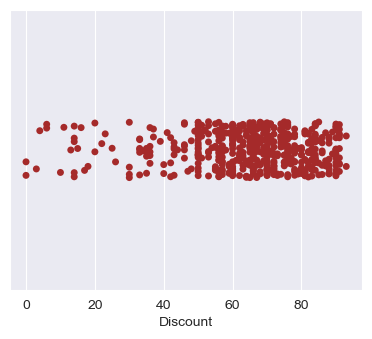

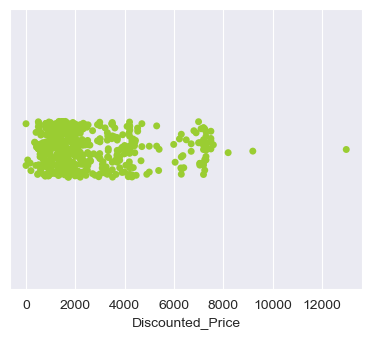

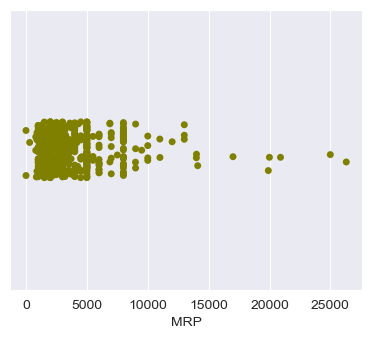

In [57]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.stripplot('Offer_Price',data=df1, color='orange')
plt.show()

plt.figure(figsize=(10,8))
plt.subplot(2,2,2)
sns.stripplot('Discount',data=df1, color='brown')
plt.show()

plt.figure(figsize=(10,8))
plt.subplot(2,2,3)
sns.stripplot('Discounted_Price',data=df1, color='yellowgreen')
plt.show()

plt.figure(figsize=(10,8))
plt.subplot(2,2,4)
sns.stripplot('MRP',data=df1, color='olive')
plt.show()


* Shows Distribution of Offer Price i.e in range of 200 to 26,000Rs. but Forms a cluster around Rs 200 to 5000
* Shows Distribution of Discount i,e many products are having discount between 45% to 85% 
* Shows Distribution of Discounted Price from around Rs 500 to Rs 13,000 and cluster between 500 to 5000
* Shows Distribution of MRP Price from around Rs 500 to Rs 26,000 and cluster between 500 to 5000

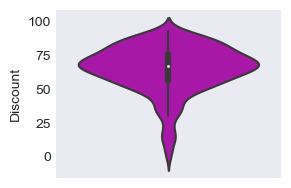

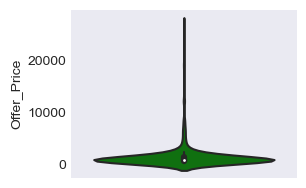

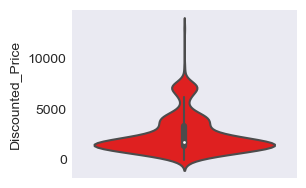

<AxesSubplot:ylabel='MRP'>

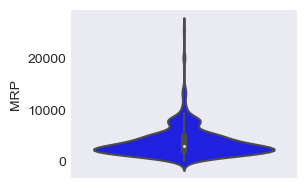

In [477]:
plt.subplot(2,2,1)
sns.violinplot(y='Discount', data=df1, color='m')
plt.show()
plt.subplot(2,2,2)
sns.violinplot(y='Offer_Price', data=df1, color='g')
plt.show()
plt.subplot(2,2,3)
sns.violinplot(y='Discounted_Price', data=df1, color='r')
plt.show()
plt.subplot(2,2,4)
sns.violinplot(y='MRP', data=df1, color='b')

* Shows Distribution of Offer Price i.e in range of 200 to 26,000 Rs. but Forms a violin around Rs 200 to 5000
* Shows Distribution of Discount i,e many products are having discount between 45% to 85% 
* Shows Distribution of Discounted Price from around Rs 500 to Rs 13,000 and products between 500 to 5000
* Shows Distribution of MRP Price from around Rs 500 to Rs 26,000 and more products between 500 to 5000

# 6. Bi-Variate and Multi-Variate Analysis:

## top10 brands based on aggregate 

In [58]:
brand_stats = pd.pivot_table(df1, index='Brand', values=['Rating', 'Reviews', 'Discount', 'Discounted_Price'], aggfunc={'Rating':'sum', 'Reviews':'mean', 'Discount':'mean', 'Discounted_Price':'mean'})


In [479]:
b = brand_stats.sort_values(by=['Rating', 'Reviews','Discount', 'Discounted_Price'], ascending=False)
top10Brands =b.head(10)
top10Brands

,Discount,Discounted_Price,Rating,Reviews
Brand,,,,
boAt,48.700000,1947.350000,74.9,162599.300000
Wings,62.684211,2684.210526,72.4,12577.315789
Noise,59.941176,2535.588235,67.5,72656.294118
truke,60.866667,2020.000000,58.8,22410.000000
Boult,73.866667,4442.400000,58.6,47823.333333
DigiClues,83.812500,5129.562500,57.8,68.250000
Digiwins,85.928571,5529.000000,50.2,103.285714
Mivi,60.083333,1809.666667,46.6,118162.166667
Tunifi,85.285714,4677.285714,44.9,198.071429


In [480]:
top10Brands.describe()

,Discount,Discounted_Price,Rating,Reviews
count,10.000000,10.000000,10.00000,10.000000
mean,68.516884,3308.661920,56.63000,43843.946149
std,12.898153,1458.564106,12.80391,57162.307498
min,48.700000,1809.666667,34.60000,68.250000
25%,60.279167,2092.888889,47.50000,608.914683
50%,63.342105,2609.899381,58.20000,17493.657895
75%,81.326042,4618.564286,65.32500,66448.053922
max,85.928571,5529.000000,74.90000,162599.300000


In [481]:
top10Brands.info

<bound method DataFrame.info of             Discount  Discounted_Price  Rating        Reviews
Brand                                                        
boAt       48.700000       1947.350000    74.9  162599.300000
Wings      62.684211       2684.210526    72.4   12577.315789
Noise      59.941176       2535.588235    67.5   72656.294118
truke      60.866667       2020.000000    58.8   22410.000000
Boult      73.866667       4442.400000    58.6   47823.333333
DigiClues  83.812500       5129.562500    57.8      68.250000
Digiwins   85.928571       5529.000000    50.2     103.285714
Mivi       60.083333       1809.666667    46.6  118162.166667
Tunifi     85.285714       4677.285714    44.9     198.071429
PTron      64.000000       2311.555556    34.6    1841.444444>

### Bar Plot Bar for average rating and brand

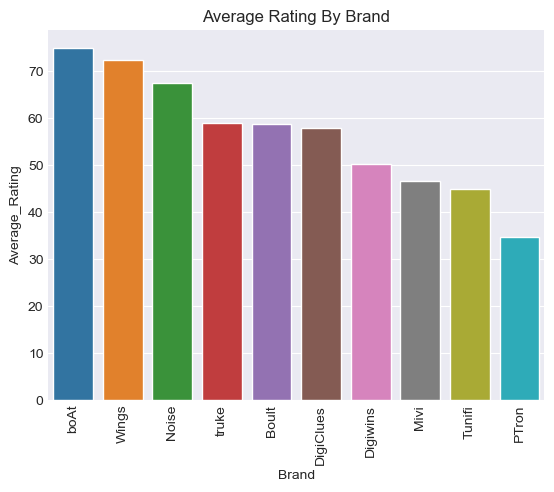

In [482]:
#Plot Bar for verage rating and brand
#plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(x=top10Brands.index, y=top10Brands['Rating'], data=top10Brands)

plt.xlabel('Brand')
plt.ylabel('Average_Rating')
plt.title('Average Rating By Brand')
plt.xticks(rotation=90)
plt.show()



We can observe from that Boat is the most average rated brand, followed by Wings and Noise respectively

### Bar plot for Average Discount vs Brand

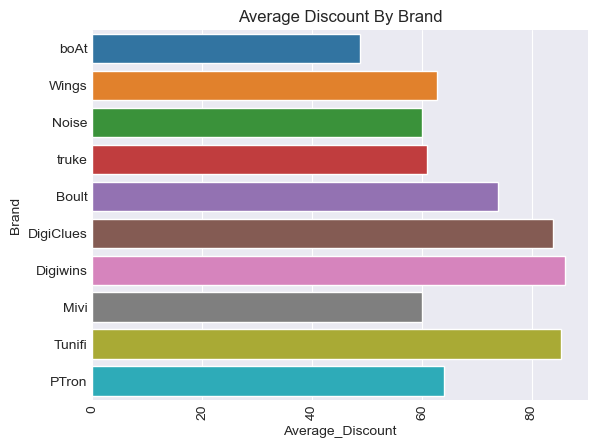

In [483]:
#Bar plot for avg discount
#plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.barplot(y=top10Brands.index, x=top10Brands['Discount'], data=top10Brands)
plt.ylabel('Brand')
plt.xlabel('Average_Discount')
plt.title('Average Discount By Brand')
plt.xticks(rotation=90)
plt.show()

### Pie Chart On Discount given by Brands

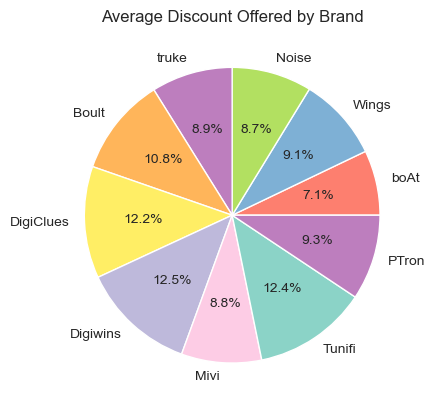

In [484]:
col=["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7","#bd7ebe"]

plt.pie(top10Brands['Discount'], labels=top10Brands.index, autopct='%1.1f%%', colors=col)
plt.title('Average Discount Offered by Brand')
plt.show()

In [ ]:
* We can visualise that `Digiwins` is the brand with offering the highest average discount of all.
* `Digiclues`, `Tunifi` and `Boult` are some of the other brands offering maximum average discount on their products

## Top 5 Brands With Maximum Number of Reviews

Text(0.5, 1.0, 'Brands With Max Aggregated Reviews')

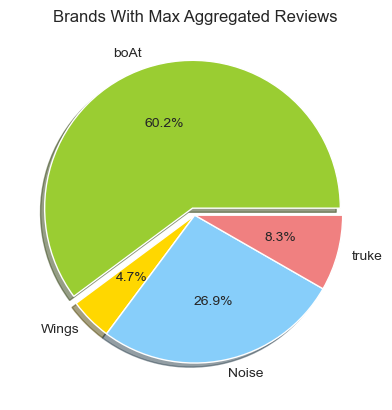

In [485]:
#oll=["#d7658b" ,"#54bebe", "#98d1d1", "#dedad2", "#76c8c8", "#76c8c8","#e4bcad", "#df979e", ]
coll2=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.pie(top10Brands['Reviews'].iloc[0:4], labels=top10Brands.index[0:4], colors=coll2, autopct='%1.1f%%',shadow=True,explode=(0.05,0,0,0))
plt.title('Brands With Max Aggregated Reviews')

Boat is the brand with highest number of aggregated reviews with the percentage of 60.02%, and second is Noise with 26.9%

In [486]:
top10affordable= df1.sort_values(by='Offer_Price', ascending=True)

top10affordable.iloc[0:10]

,Product,Rating,MRP,Offer_Price,Discount,Reviews,Brand,Discounted_Price
356,ROREX K1 Single Ear Wireless with Mic Bluetoot...,3.1,799.0,199.0,75,7,ROREX,600.0
667,MR ROBOT K1 Wireless Bluetoth Single Ear Heads...,0.0,999.0,219.0,78,0,MR,780.0
358,"Deepsheila 32H Playtime, 45ms Ultra-Low Latenc...",2.7,299.0,230.0,23,18,Deepsheila,69.0
697,MOOZMOB Latest Version B11 Neckband Bluetooth ...,3.4,1499.0,296.0,80,112,MOOZMOB,1203.0
233,icall X9 Mini Wireless Earbuds Comfortable For...,3.4,999.0,313.0,68,264,icall,686.0
468,icall BBD-Low Price Bluetooth X9 Bluetooth Hea...,3.7,999.0,320.0,67,177,icall,679.0
626,P3A Bluetooth Pack of 2 Bluetooth Headset,3.5,1998.0,327.0,83,772,P3A,1671.0
543,MASOORI HI-i7 tw -76 Bluetooth Gaming Headset,0.0,999.0,349.0,65,0,MASOORI,650.0
497,Met style Genuine Bluetooth Earphones i7 EARBU...,4.0,1299.0,359.0,72,4,Met,940.0
404,NICK JONES In the ear I11s TWS Wireless Stereo...,3.1,2888.0,369.0,87,82,NICK,2519.0


## BarPlot for 10 most affordable products Based On Offer_Price:
### Categorical vs Continous

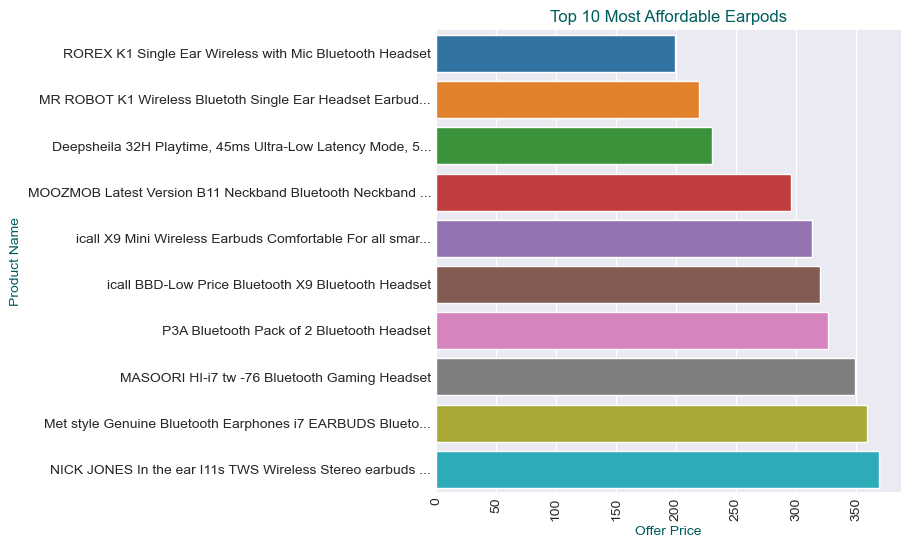

In [487]:
#bar chart for 10 most affordable product
plt.figure(figsize=(6,6))

sns.barplot(data=top10affordable, y=top10affordable['Product'].iloc[0:10], x=top10affordable['Offer_Price'].iloc[0:10])
plt.xlabel('Offer Price', color='#005d5d')
plt.ylabel('Product Name', color='#005d5d')
plt.title('Top 10 Most Affordable Earpods', color='#005d5d')
plt.xticks(rotation = 90)
plt.show()

<b>Analysis:</b>

#### <font color=#005d5d> Most cheapest and `affordable` earpods is `ROREX K1` with price rs `199` </font>




## Top 10 Expensive Products Based On Offer_Price:

### Categorical vs Continous

In [45]:
top10expensive= df1.sort_values(by='Offer_Price', ascending=False)

top10expensive=top10expensive.iloc[0:10]
top10expensive

,Product,Rating,MRP,Offer_Price,Discount,Reviews,Brand,Discounted_Price
506,APPLE Airpods Pro 2nd Generation Bluetooth Hea...,4.5,0.0,26900.0,0,1032,APPLE,0.0
261,APPLE Airpods Pro with MagSafe Charging Case B...,4.5,26300.0,22500.0,14,50809,APPLE,3800.0
514,APPLE Airpods (3rd Generation) with Magsafe Ch...,4.3,20900.0,19600.0,6,2532,APPLE,1300.0
293,APPLE Airpods (3rd Generation) with Lightning ...,4.3,19900.0,19100.0,4,120,APPLE,800.0
527,Google Pixel Buds Pro with Active Noise Cancel...,4.6,19990.0,17990.0,10,443,Google,2000.0
718,"JBL Live Pro 2, Active Adaptive Noise Cancella...",4.3,16999.0,13999.0,17,136,JBL,3000.0
248,Apple AirPods(2nd gen) with Charging Case Blue...,4.5,14100.0,12499.0,11,109455,Apple,1601.0
240,OnePlus Buds Pro 2 Bluetooth Headset,4.3,13999.0,11999.0,14,303,OnePlus,2000.0
552,"LG FP6W Active Noise Cancelling Earbuds, 22 Hr...",4.3,24990.0,11999.0,51,71,LG,12991.0
729,Sennheiser CX True Wireless Earbuds for Music ...,4.8,10990.0,8990.0,18,8,Sennheiser,2000.0


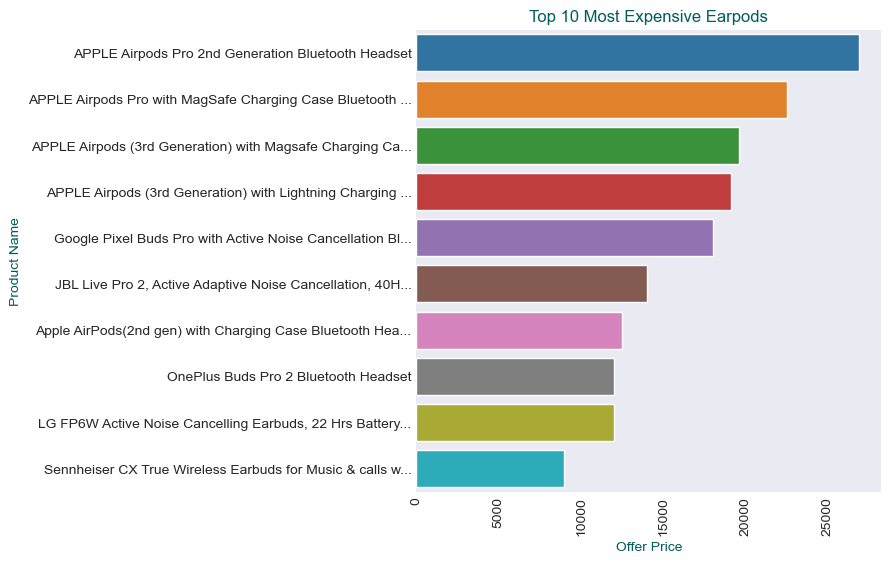

In [350]:
#Barplot for 10 most expensive products. Offer_Price vs Products
plt.figure(figsize=(6,6))
sns.set_style('dark')
sns.barplot(data=top10expensive, y=top10expensive['Product'].iloc[0:10], x=top10expensive['Offer_Price'].iloc[0:10])
plt.xlabel('Offer Price', color='#005d5d')
plt.ylabel('Product Name', color='#005d5d')
plt.title('Top 10 Most Expensive Earpods', color='#005d5d')
plt.xticks(rotation =90)
plt.show()

<b>Analysis:</b>
    
#### The most expensive product is `APPLE Airpods Pro 2nd Generation` with price of `Rs.26,900`

## Top10 Expensive Brands:
### Categorical vs Continous

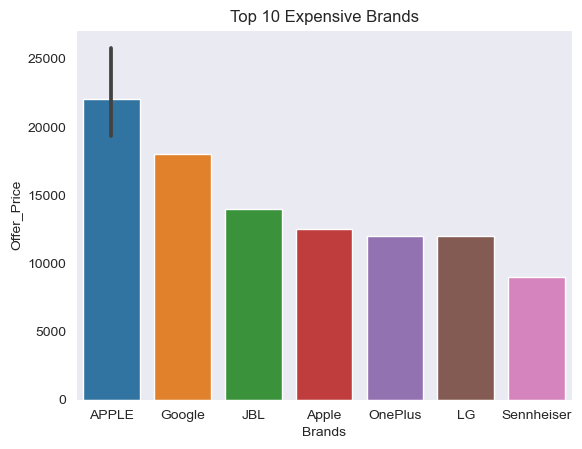

In [46]:
sns.barplot(x=top10expensive['Brand'].iloc[0:10], y=top10expensive['Offer_Price'].iloc[0:100], data=top10expensive)
sns.set_style('darkgrid')
plt.xlabel('Brands')
plt.ylabel('Offer_Price')
plt.title('Top 10 Expensive Brands')
plt.xticks()
plt.yticks()
plt.show()


<b>Apple is the most expensive Brand having product worth <div class="burk"> Rs.20,000</div><i class="fa fa-lightbulb-o "></i>

## Top10 Affordable Brands:
### Categorical vs Continous

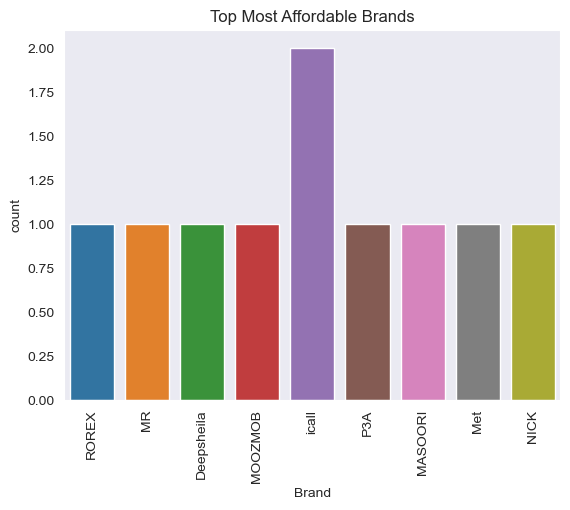

In [43]:
#count plot for affordable Brand
sns.countplot(x=top10affordable['Brand'].iloc[0:10], data=top10affordable)
plt.xticks(rotation =90)
plt.title("Top Most Affordable Brands")
plt.show()

In [491]:
top10affordable['Brand'].iloc[0:10]

356         ROREX
667            MR
358    Deepsheila
697       MOOZMOB
233         icall
468         icall
626           P3A
543       MASOORI
497           Met
404          NICK
Name: Brand, dtype: object

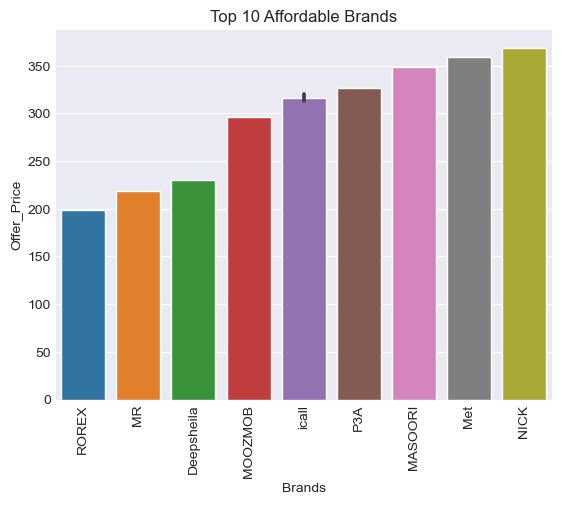

In [492]:
#Bar plt for affordble brand
sns.barplot(x=top10affordable['Brand'].iloc[0:10], y=top10affordable['Offer_Price'].iloc[0:10], data=top10affordable)
sns.set_style('darkgrid')
plt.xlabel('Brands')
plt.ylabel('Offer_Price')
plt.title('Top 10 Affordable Brands')
plt.xticks(rotation=90)
plt.yticks()
plt.show()

<b>We can observe that Rorex is the most Affordable Brand 1. ROREX
2. MR
3. Deepsheila
4. MOOZMOB
5. icall </b>

In [493]:
df1.corr()

,Rating,MRP,Offer_Price,Discount,Reviews,Discounted_Price
Rating,1.000000,0.215264,0.190556,-0.146375,0.114908,0.123849
MRP,0.215264,1.000000,0.673791,-0.078775,-0.008055,0.694278
Offer_Price,0.190556,0.673791,1.000000,-0.587117,0.038632,0.062207
Discount,-0.146375,-0.078775,-0.587117,1.000000,-0.136709,0.525688
Reviews,0.114908,-0.008055,0.038632,-0.136709,1.000000,-0.051533
Discounted_Price,0.123849,0.694278,0.062207,0.525688,-0.051533,1.000000


### discount vs reviews
### Continous vs Continous

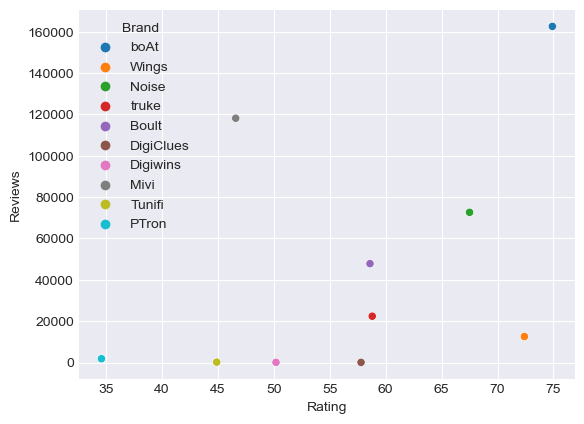

In [494]:
sns.scatterplot(x=top10Brands['Rating'], y= top10Brands['Reviews'], data=top10Brands, hue='Brand')
plt.show()

There is no positive or negative relationship between Rating and reviews

### Offer Price Vs MRP

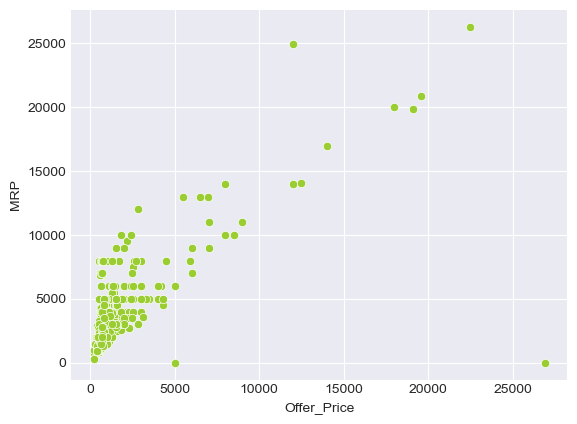

In [495]:
sns.scatterplot(x=df1['Offer_Price'], y=df1['MRP'], data=df1, color='yellowgreen')
plt.show()

<b>There is positive linear relationship between Offer Price and MRP. i.e as MRP is increasing Offer Price is also increasing</b>

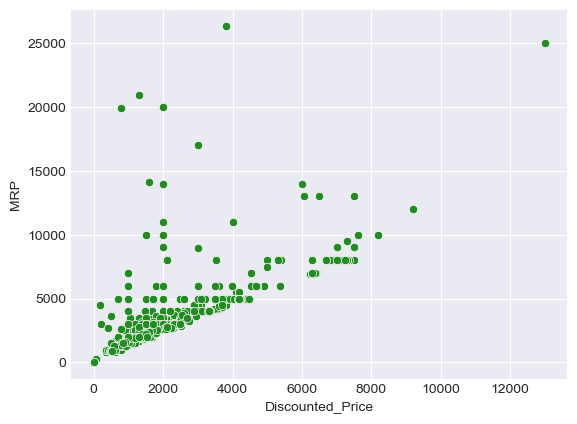

In [438]:
sns.scatterplot(x=df1['Discounted_Price'], y=df1['MRP'], data=df1, color='forestgreen')
plt.show()

<b>There is positive linear relationship between Discounted Price and MRP. i.e as MRP is increasing Discounted Price is also increasing</b>

### We can observe that our products are forming a cluster and many products are under 5000 and overall between 0 and rs 15,000

### Scatter Plot:
### Continous vs continous

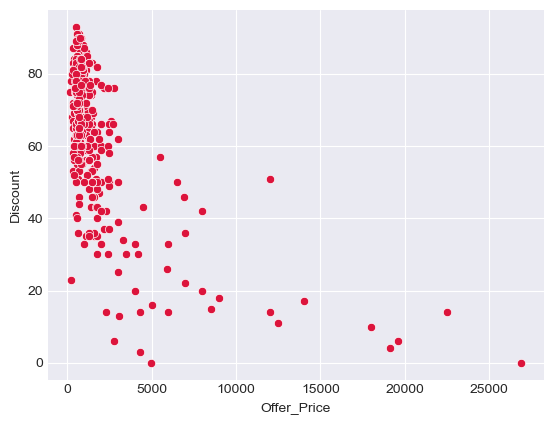

In [437]:
sns.scatterplot(x=df1['Offer_Price'], y=df1['Discount'], data=df1, color='crimson')
plt.show()

There is negative corelation between Offer Price and Discount

## Box Plot For Brand Vs MRP

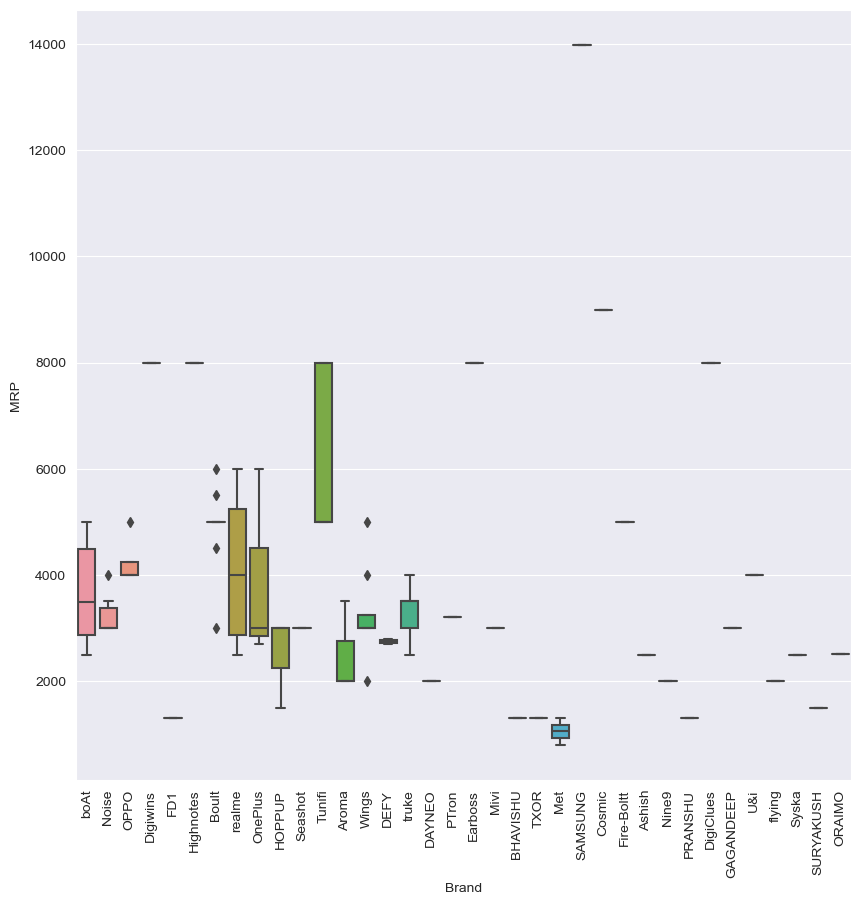

In [47]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Brand', y='MRP',data=df1[:100])
plt.xticks(rotation=90)
plt.show()

The above Box Plot shows Brand vs MRP, each brand and their price rnge max,min,interquartile range and also outliers

## CrossTab - Categorical vs Categorical

In [389]:
pd.crosstab(df1['Product'], df1['Brand'])

Brand,APPLE,ASTOUND,Accruma,Adone,Apple,Aroma,Ashish,BHAVISHU,BHIMANSHI,BITTERTECH,...,myxes,namo,onechance,realme,snowbudy,thejunni,truke,ultiads,v,x
Product,,,,,,,,,,,,,,,,,,,,,
APPLE Airpods (3rd Generation) with Lightning Charging ...,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
APPLE Airpods (3rd Generation) with Magsafe Charging Ca...,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
APPLE Airpods Pro 2nd Generation Bluetooth Headset,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
APPLE Airpods Pro with MagSafe Charging Case Bluetooth ...,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASTOUND D25-T2 True Wireless Bluetooth Headset Bluetoot...,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"truke Fit1+ with 36H of Playtime, Gaming Mode, 10mm Dri...",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
"ultiads 40 Hours Playtime with Crystal Sound, Noise Can...",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
v chip M19 Bluetooth Headset,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<b>The above Dataframe depicts the as true if product of that brand is present else false</b>

## Heatmap

Text(0.5, 1.0, 'Heat Map')

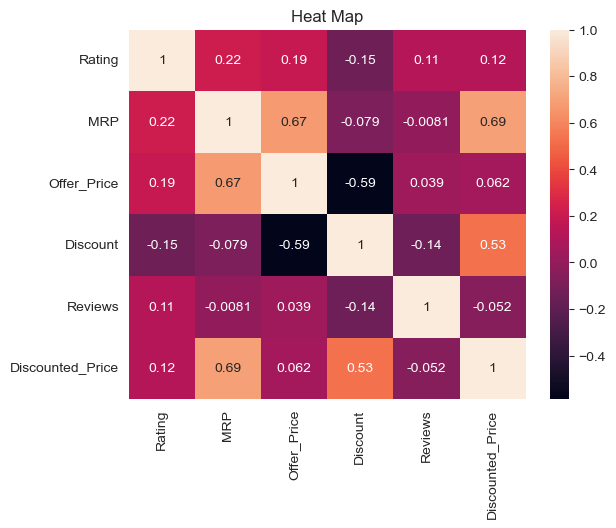

In [48]:
#plt.figure(figsize=(50,40))
p = sns.heatmap(df1.corr(), annot=True)
plt.title("Heat Map")

* The Heatmap above says that if black squares means there is strong negative corelation between `Discount and Offer Price` 
* The brown colour depicts strong positive corelation between them i.e in between MRP vs OfferPrice and MRP vs Discounted Price and Discount vs Dscounted Price

## Pairplot

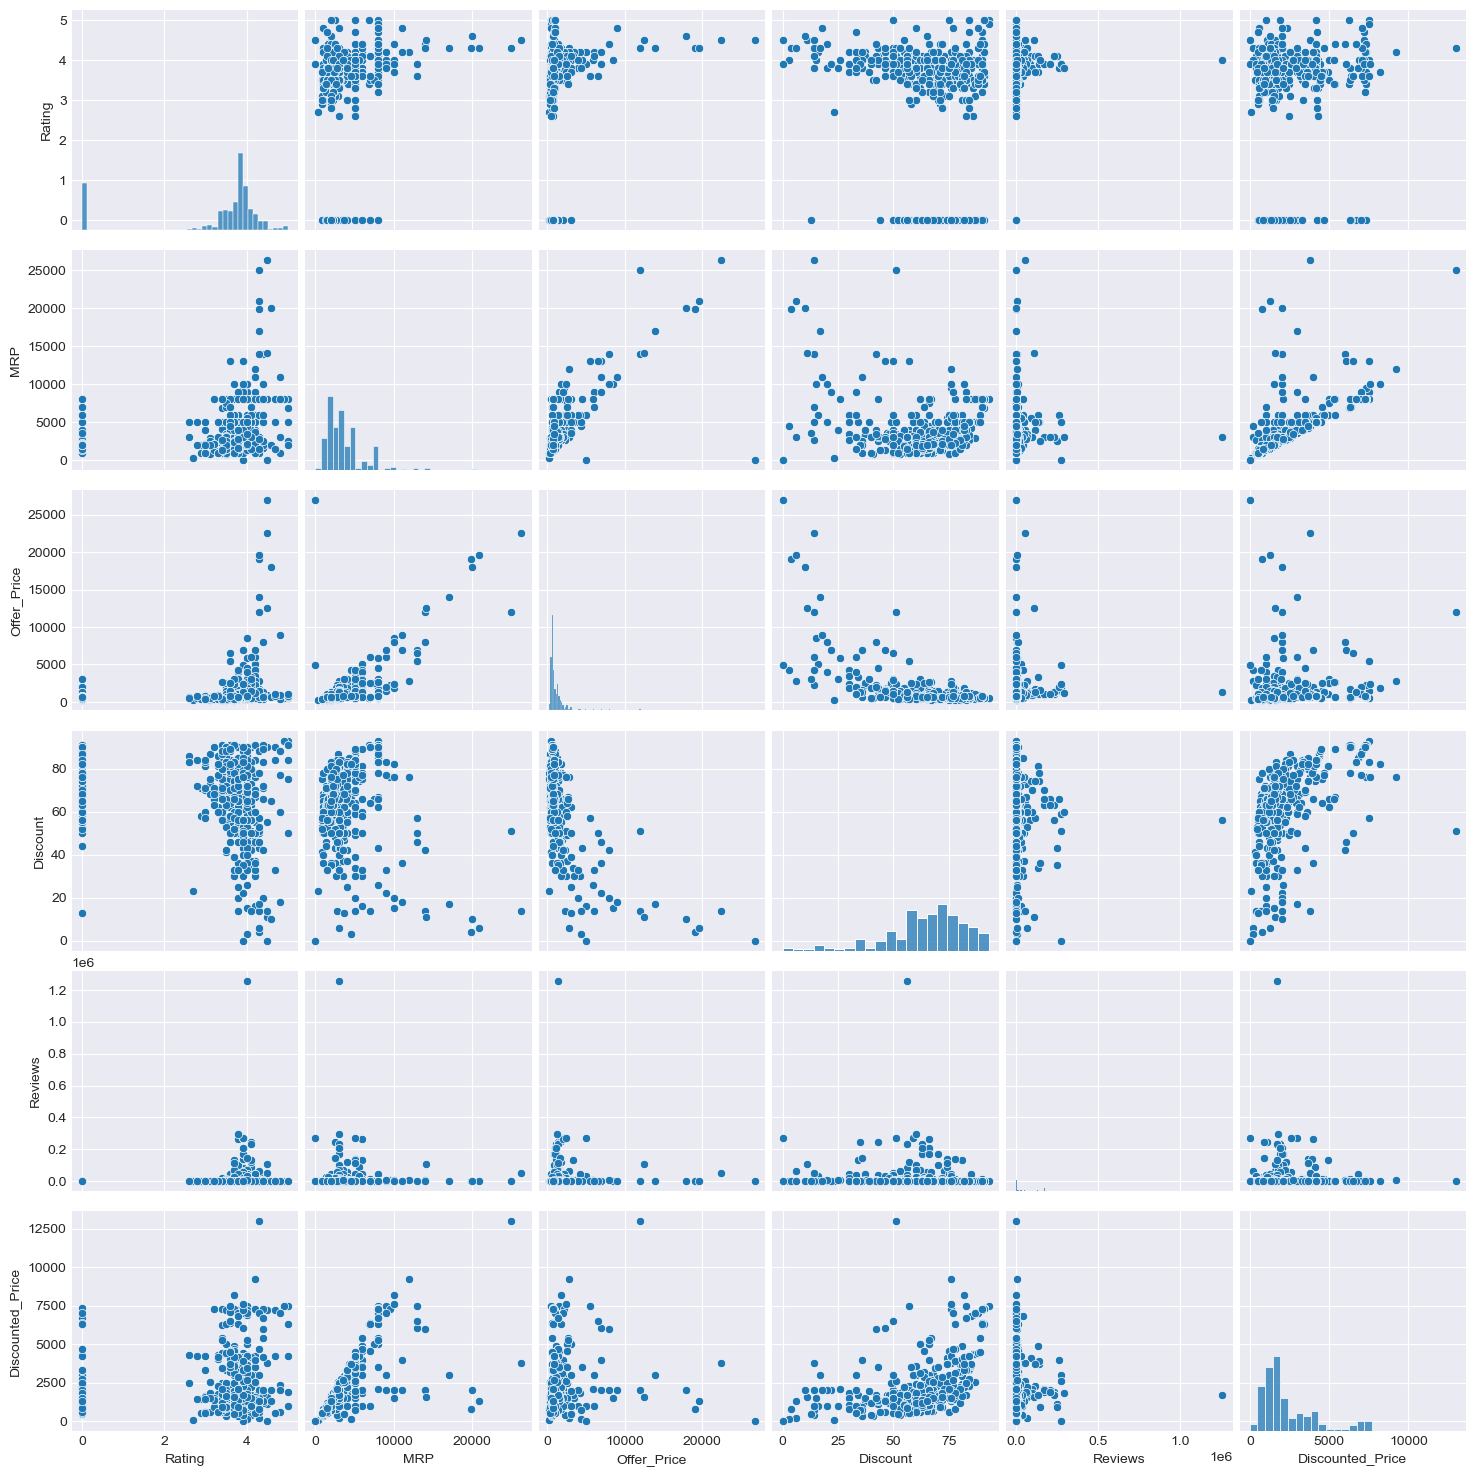

In [423]:
sns.pairplot(df1)

# 7. Conclusion

* From the above analysis I conclude that BoAt is the Brand having maximum number of products, Highest Average Ratings as well as Reviews. 
* Most reviewed product is boAt Airdopes 131 with number of reviews 1258071
* BoAt is the brand having most Average Percentage of Reviews i.e 60.2%
* Boat Brand has 177 products i.e 23.0% and is highest of all brands
* Products are priced from the range of Rs.199 to maximum Rs 26,900 based on Offer Price, but maximum products are upto Rs 5000
* The most Expensive product is APPLE Airpods Pro priced for Rs. 26,300
* Most cheapest is ROREX K1 Priced for Rs 199
* APPLE is the most expensive brand 
* ROREX is the most affordable brand
* BoAt is most averagely Rated and Reviewed brand and we can indirectly say that BoAt is the most purchased Brand
* Digiwins is the brand offering the highest average discount i.e 93% on the product "Digiwins T2 Earbuds".

